In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["font.family"] = ["sans-serif"]
plt.rcParams["font.sans-serif"] = ["Arial"]
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["savefig.bbox"] = "tight"
sc.set_figure_params(vector_friendly=True, dpi_save=300) 


# Pool all cnidarians

In [2]:
scler=sc.read_h5ad('/home/tbou/data/Coral/H5ADs/Scleractinians_all_properties.h5ad') # from repository
cnid=sc.read_h5ad('/home/tbou/data/Coral/H5ADs/Cnidarians_NO_SCLER_all_properties.h5ad')

ad=cnid.concatenate(scler)

In [4]:

ad=ad.raw.to_adata()
ad.raw=ad
sc.pp.scale(ad)
sc.pp.neighbors(ad,n_neighbors=15,metric="correlation")
sc.tl.umap(ad,min_dist=.2)
sc.tl.leiden(ad, resolution=.2)


ad.obs.specie.value_counts()

Pavona_decussata            2419
agaricia.species            2175
diploria.species            1902
Pavona_Cactus               1901
Merulina_scabricula         1839
Stylophora_pistillata       1579
Echinopora_lamellosa        1242
fungia.species              1121
exaiptasia.diaphana         1006
cassiopea.andromeda          888
cirrhipathes.species         883
tubastrea.coccinea           879
Montipora_efflorescens       793
Montipora_foliosa            783
carybdea.species             596
corynactis.california        492
aiptasiogeton.species        481
cladocora.species            435
corynactis.viridis           401
zoanthus.sociatus            375
Seriatopora_calliendrum      257
stomolophus.meleagris        223
pseudocorynactis.species     203
stichopathes.species         181
sanderia.malayensis          159
ricordea.species             112
Name: specie, dtype: int64

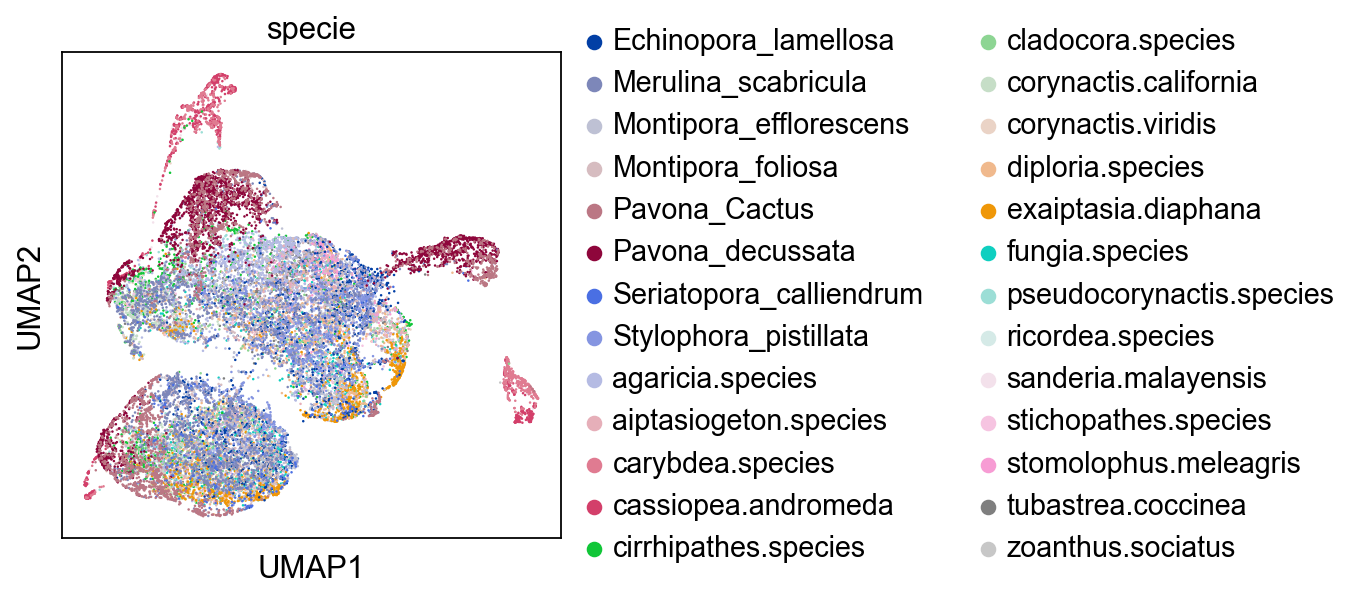

In [5]:
sc.pl.umap(ad,color="specie")

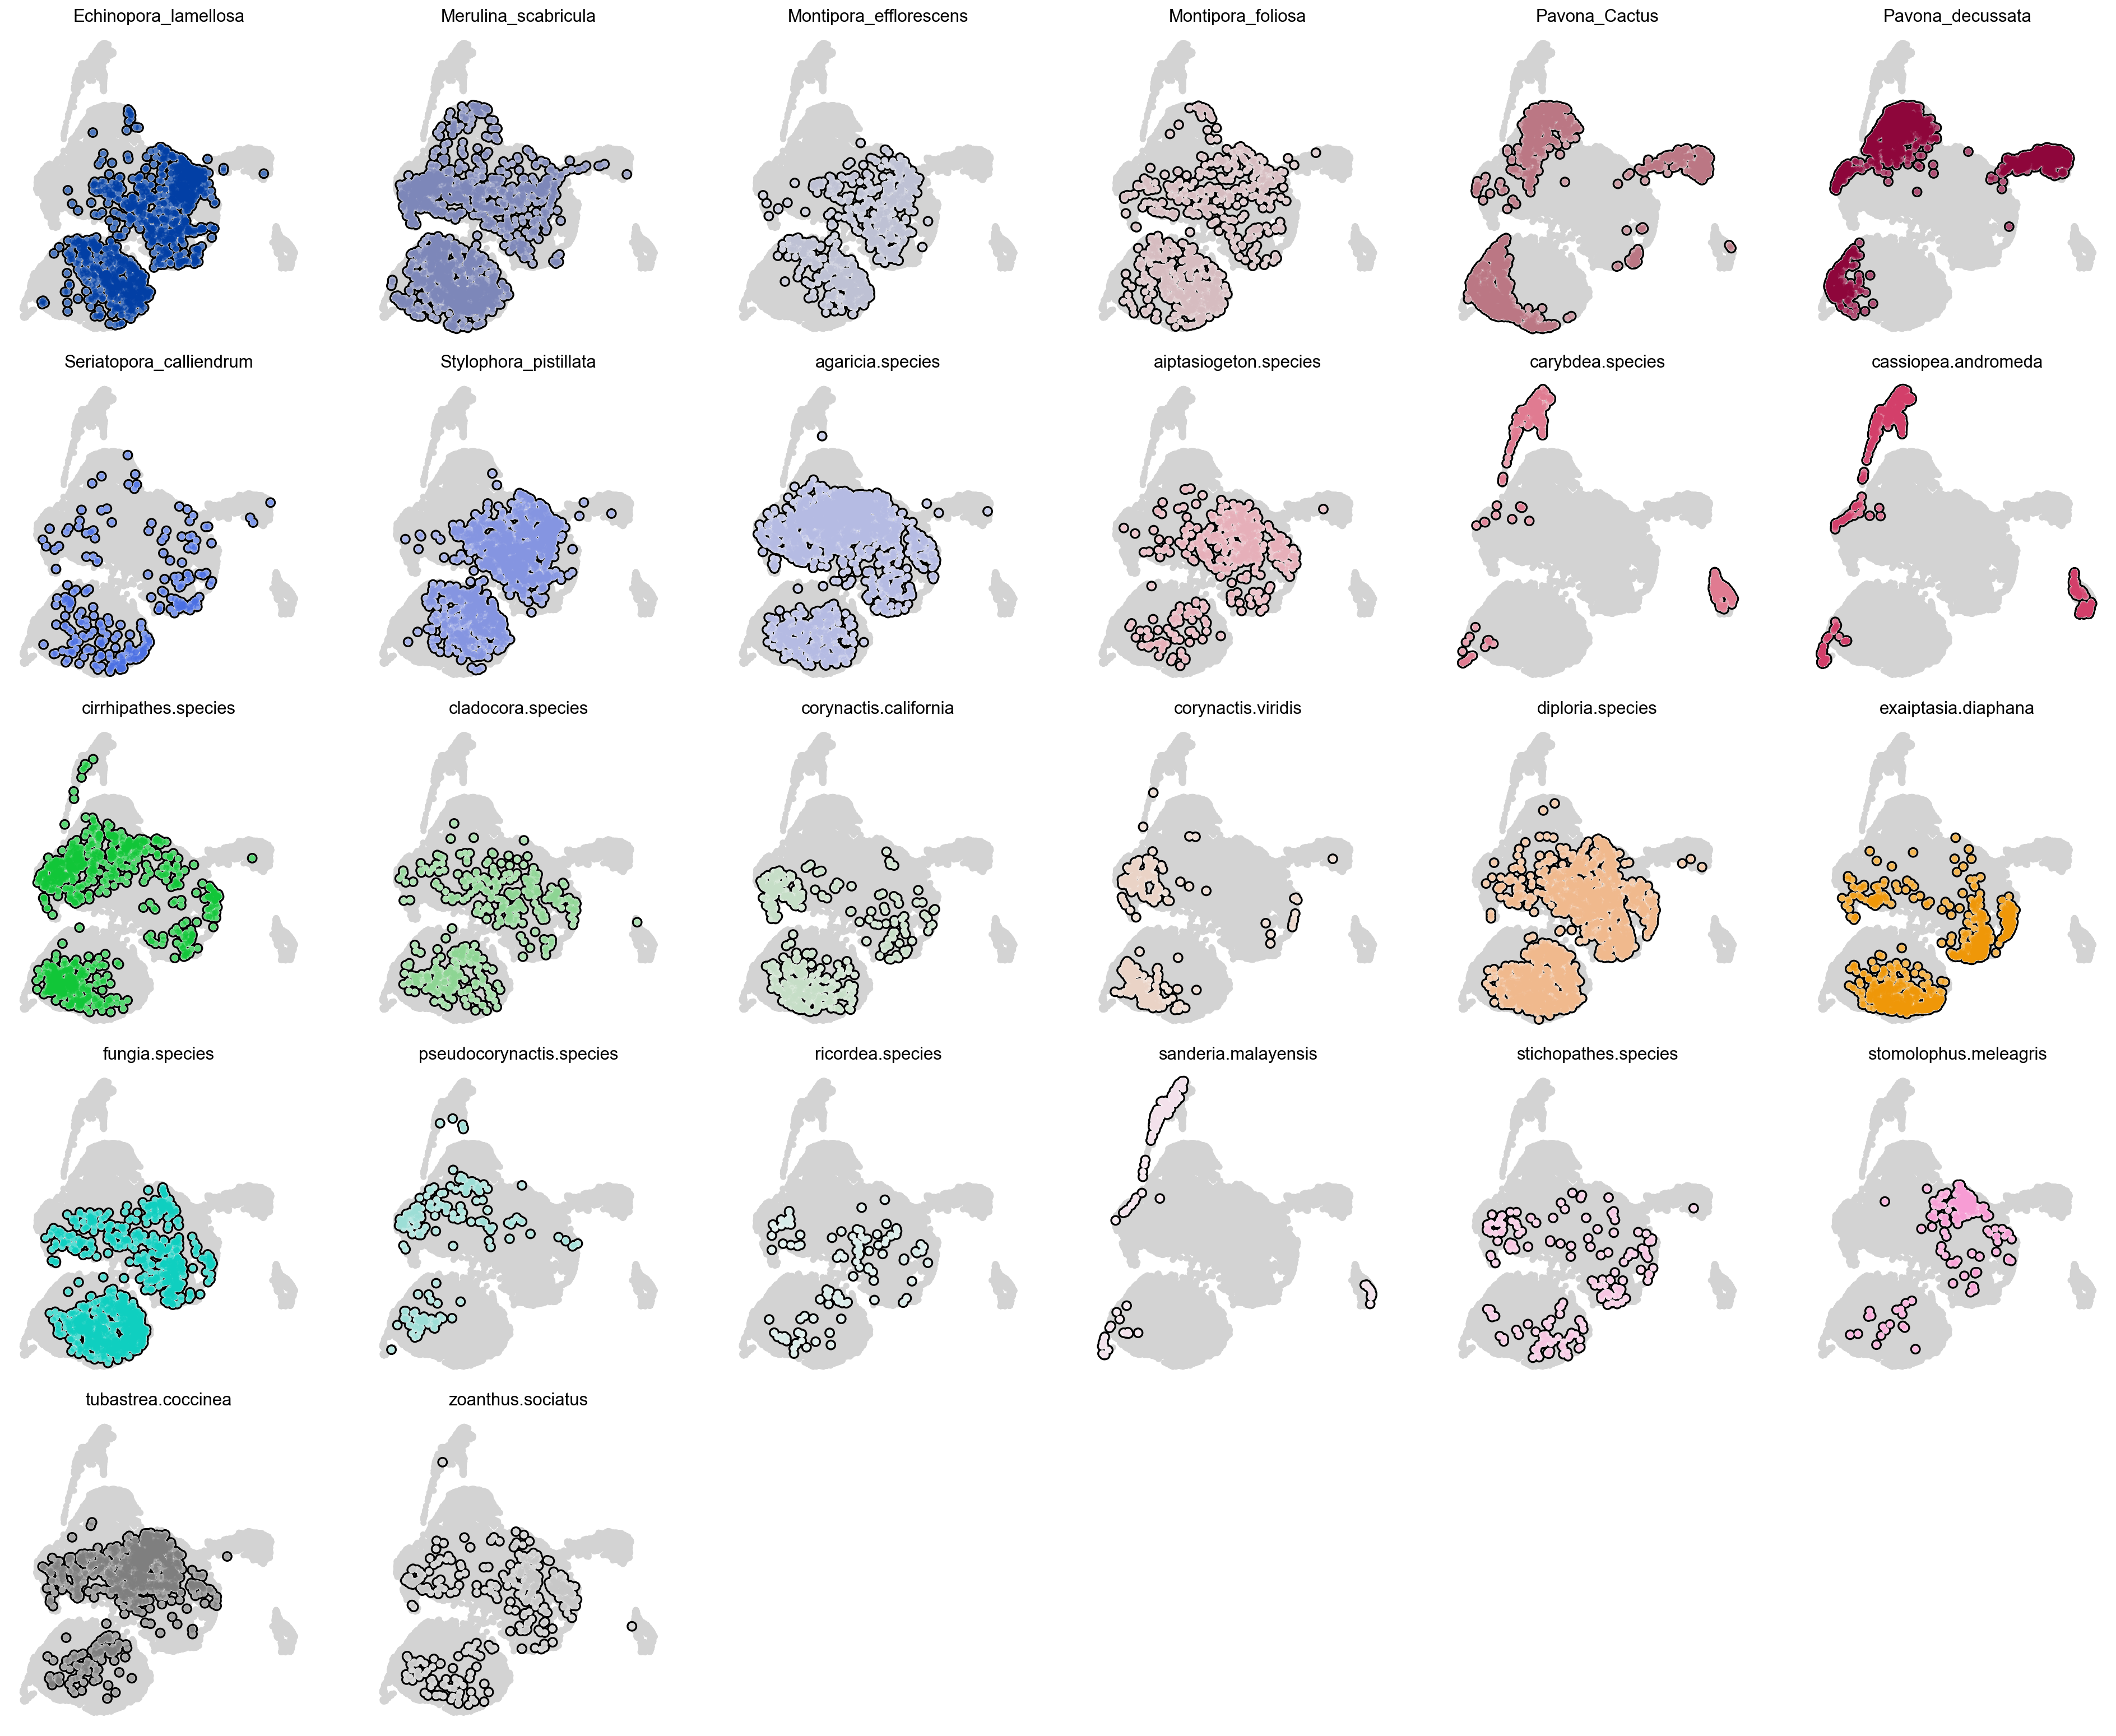

In [6]:
import math
ncol=6
nrows=math.ceil(len(list(set(ad.obs.specie)))/5)
#fig, ax = plt.subplots(figsize=(ncol*5, nrows*5))
plt.figure(figsize=(30, nrows*5))
plt.subplots_adjust(hspace=0.1, wspace=.2)

for n, species in enumerate(sorted(set(ad.obs.specie))):
    
    ax = plt.subplot(nrows, ncol, n + 1)
    
    sc.pl.umap(
    ad,
    color=None,
    show=False,
    size=100,
    frameon=False,
    ax=ax)
    
    sc.pl.umap(ad[ad.obs.specie == species],add_outline=True,
    color="specie",
    size=100,
    show=False,
    frameon=False,
    legend_fontsize=20,
    ax=ax,
    title=species)
    
    ax.legend_ = None

plt.savefig('~/data/Coral/exports/paper/UMAP_Leiden_Clustered_ALL_CNID.svg', bbox_inches="tight")

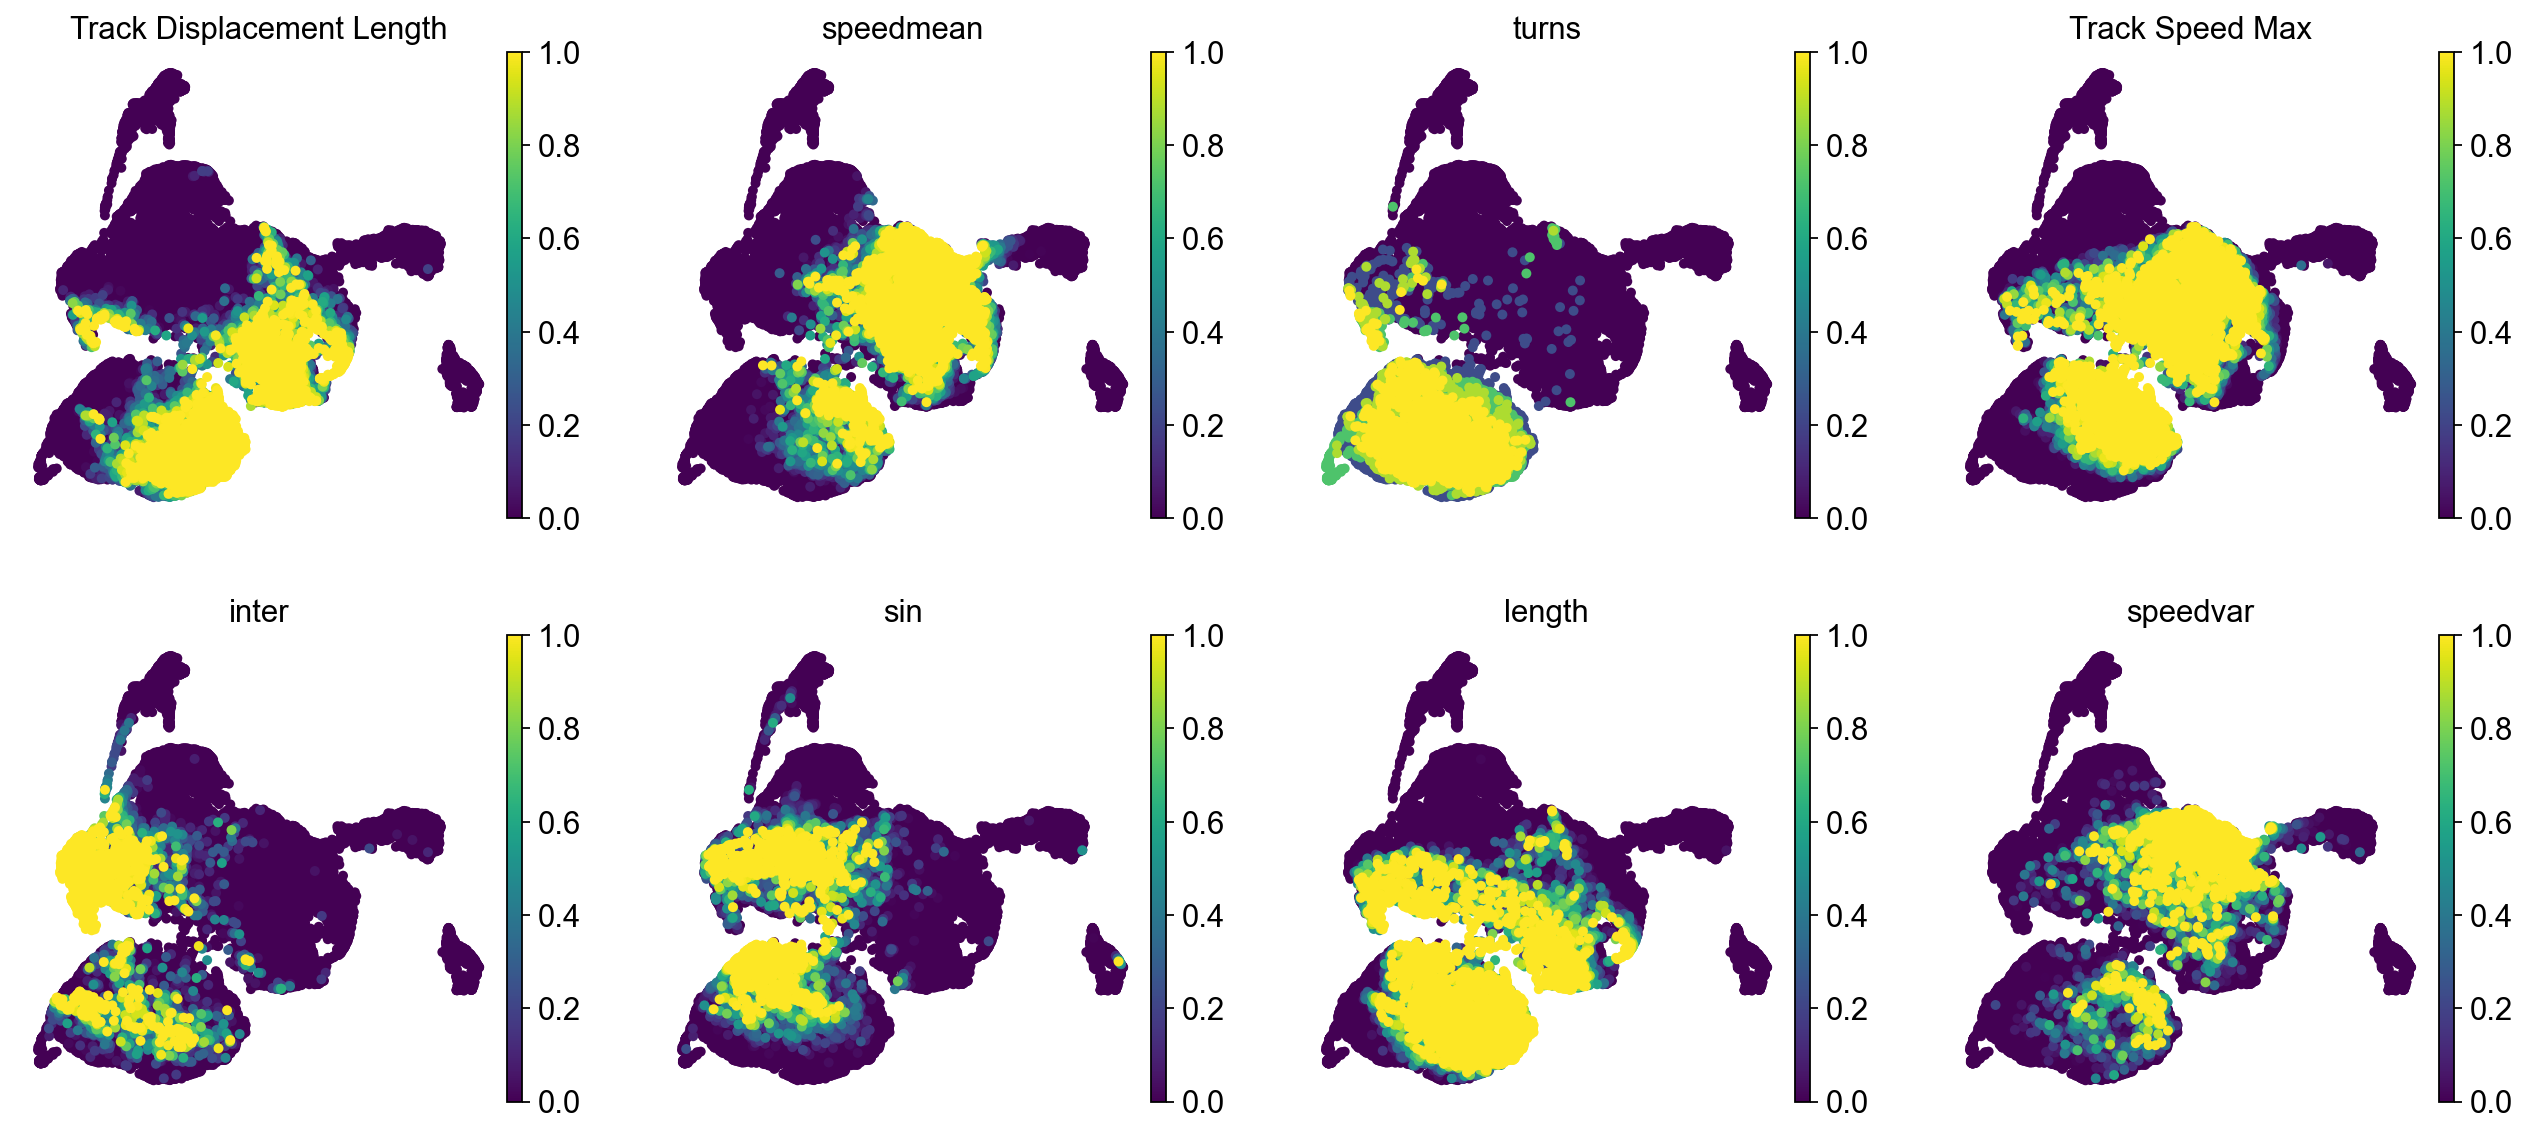

In [7]:
sc.settings.vector_friendly = False
sc.pl.umap(ad,color=list(set(ad.var_names)),size=80,frameon=False,show=False,
           vmax=1, vmin=0
          )
plt.savefig('~/data/Coral/exports/paper/UMAP_split_ALL_CNID_Parameters.svg', bbox_inches="tight")

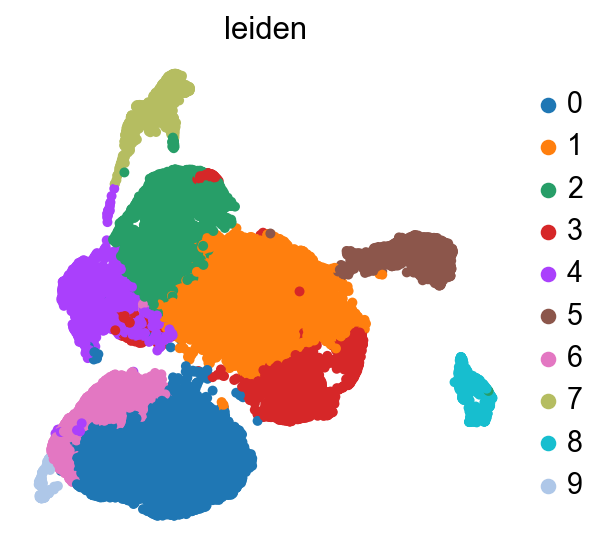

In [17]:
sc.pl.umap(ad,color='leiden',size=80,frameon=False,show=False )
plt.savefig('~/data/Coral/exports/paper/Leiden_ALL_CNID.svg', bbox_inches="tight")

# Calculate the percentage of each cluster in the species

In [9]:
proportions=[]
df=ad.obs

for spe in set(df['specie']):
    ls=df[df['specie']==spe]['leiden']
    props=pd.DataFrame(ls.value_counts())
    
    props=props.transpose()
    props['species']=spe
    #props.set_index(spe)
    proportions.append(props)
proportions=pd.concat(proportions,axis=0)

In [10]:
proportions.index=proportions['species']

In [11]:
proportions=proportions.reindex(columns=list(map(str, range(len(proportions.columns)-1))))

In [12]:
proportions

0    1     2    3    4    5    6    7    8    9
species                                                                    
ricordea.species           38   43     0   13   18    0    0    0    0    0
Stylophora_pistillata     416  944    22  111   12    3   71    0    0    0
exaiptasia.diaphana       445   36     5  489   31    0    0    0    0    0
zoanthus.sociatus          73  181     9   66   44    0    0    1    1    0
Montipora_foliosa         363  211    40   64   37    5   63    0    0    0
Seriatopora_calliendrum   126   25    16   54   12    3   21    0    0    0
corynactis.viridis        205    5     7   28  153    1    1    1    0    0
stichopathes.species       64   33     4   44   35    1    0    0    0    0
Pavona_decussata           53   15  1182    1  163  764  240    0    0    1
corynactis.california     242   29     6   67  143    0    5    0    0    0
tubastrea.coccinea        101  624    52   25   76    0    1    0    0    0
cassiopea.andromeda        10    0     9    0   60    0    0  469  215  125
carybdea.species            7    0    20    0   13    0    0  214  324   18
pseudocorynactis.species   46   28    53    2   67    0    3    2    0    2
Echinopora_lamellosa      403  553    25  168    6    8   79    0    0    0
aiptasiogeton.species      71  332    14   53    9    1    1    0    0    0
stomolophus.meleagris      18  192     1   12    0    0    0    0    0    0
cirrhipathes.species      286  167   158   85  172    2    3    7    0    3
sanderia.malayensis         7    0     2    0   16    0    1  104   14   15
agaricia.species          357  991   410  191  220    3    3    0    0    0
Pavona_Cactus             505    6   594  123   30  321  318    0    2    2
cladocora.species         173  172    16   46   21    0    6    0    1    0
Merulina_scabricula       726  321   136   75  360   11  210    0    0    0
Montipora_efflorescens    294  286    18  126    8    0   61    0    0    0
fungia.species            628  225    27  192   47    0    2    0    0    0
diploria.species          787  703    22  340   45    3    2    0    0    0

In [13]:
percentages=[]
for n in range(len(proportions.index)):
    line=proportions.iloc[n,:]
    #species=proportions.index[n]    
    total_tracks=line.sum()
    line=line.div(total_tracks).mul(100)
    d=pd.DataFrame(line)
    percentages.append(d)

In [14]:
percentages=pd.concat(percentages,axis=1)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_1643641/3569815207.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( groups,rotation=90)


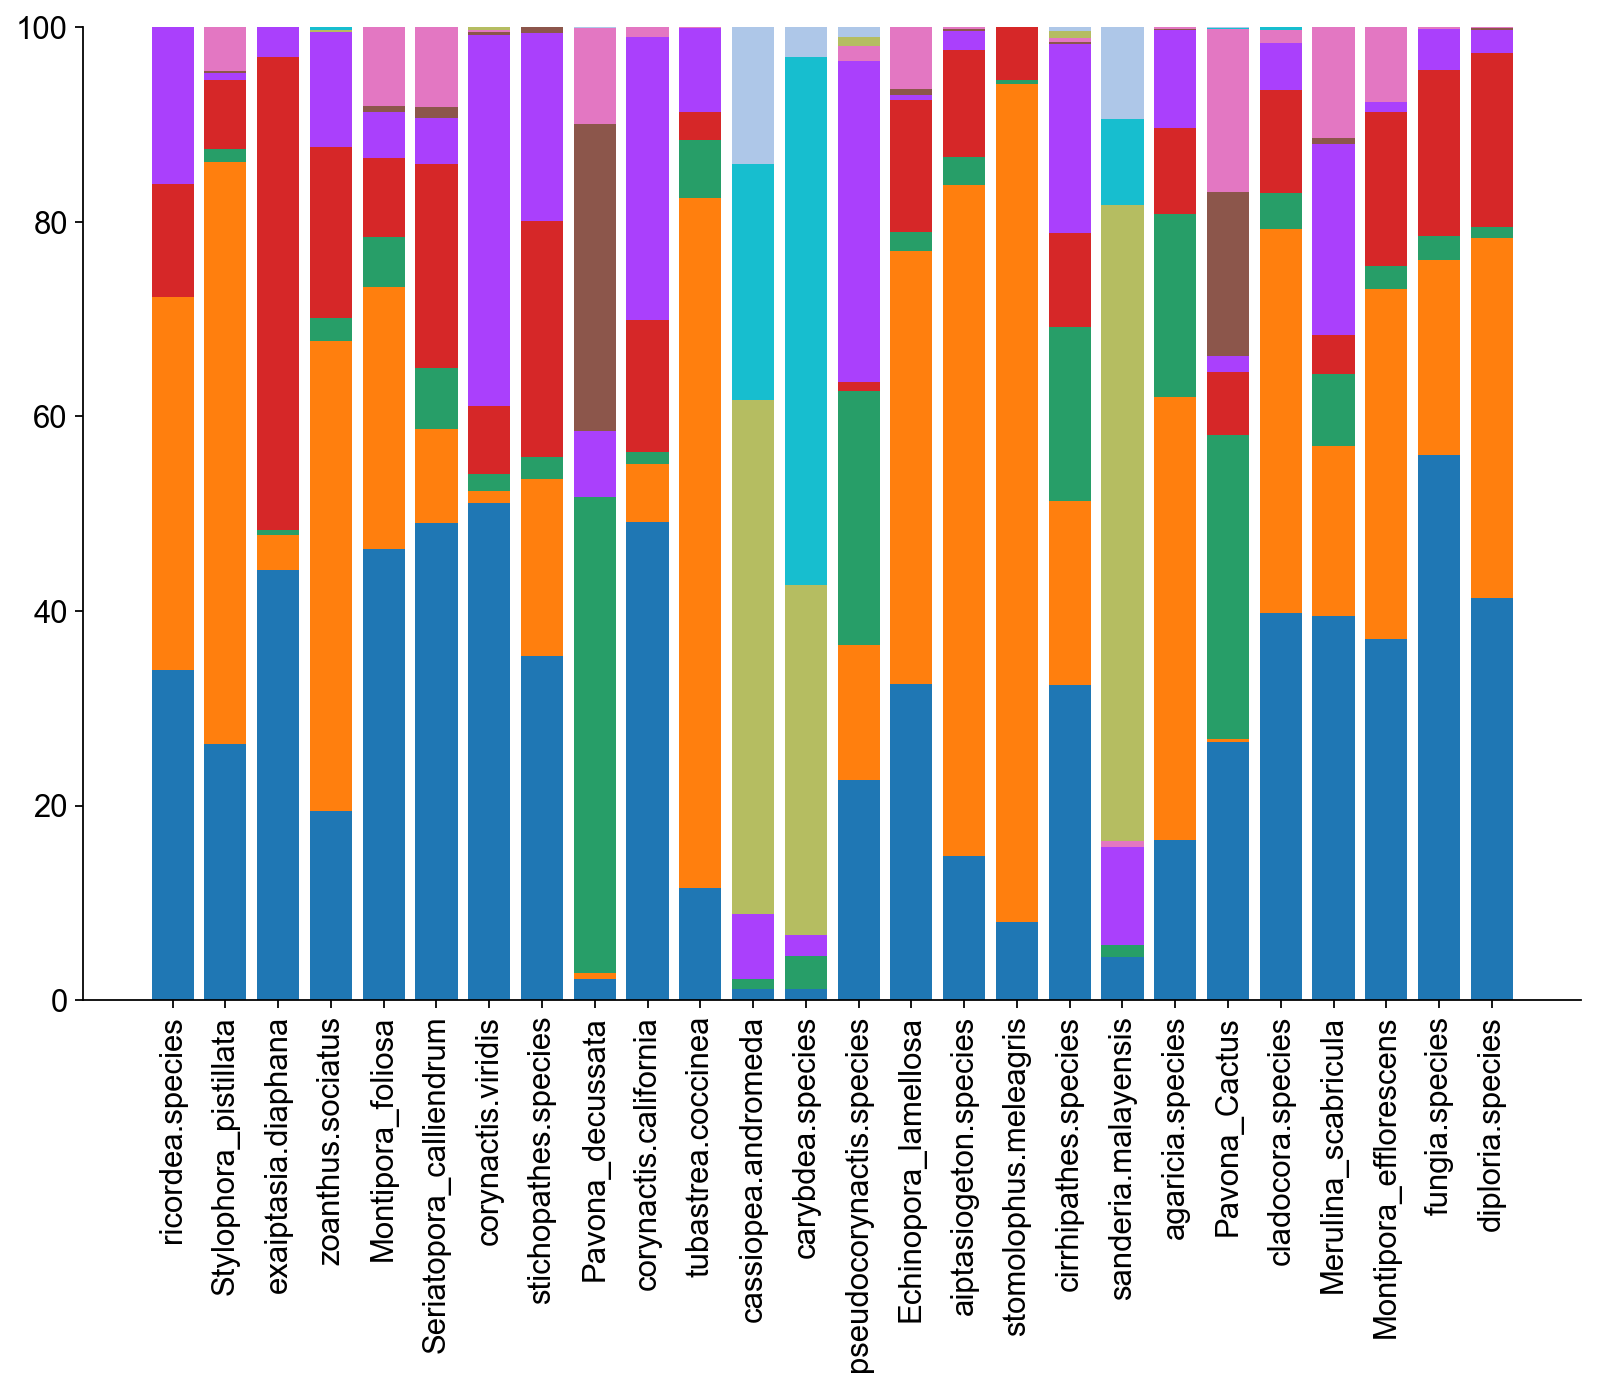

In [16]:
# Data
values = percentages.to_numpy()
groups=percentages.columns.to_list()


fig, ax = plt.subplots(figsize=(12,8))

# Stacked bar chart with loop
for i in range(values.shape[0]):
    ax.bar(groups, values[i], bottom = np.sum(values[:i], axis = 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)  
ax.grid(False)
#locs, labels = plt.xticks()
ax.set_xticklabels( groups,rotation=90)

plt.savefig('~/data/Coral/exports/paper/BARPLOTS_Leiden_proportion_per_species_ALL_CNID.svg', bbox_inches="tight")

# Calculate distance between species

In [46]:
from scipy.spatial.distance import pdist
import itertools
from scipy.spatial.distance import squareform

In [47]:
perc=percentages.transpose()
perc.index=[name.replace('.','_') for name in perc.index]

In [48]:
#Index according to clades
ordered_index=['diploria.species','tubastrea.coccinea','agaricia.species',"Seriatopora_calliendrum","Stylophora_pistillata","cladocora_species",
               "Montipora_efflorescens","Montipora_foliosa","Merulina_scabricula","fungia.species",
               "Echinopora_lamellosa","Pavona_Cactus","Pavona_decussata",#Scler
               "zoanthus.sociatus",#Zoanthria
 "aiptasiogeton.species","exaiptasia.diaphana",#actinaria
"cirrhipathes.species","stichopathes.species", #Antipatharia
 "corynactis.california","corynactis.viridis", "pseudocorynactis.species","ricordea.species",#corallimorpharia
 "cassiopea.andromeda","sanderia.malayensis",'stomolophus.meleagris'#discomedusae
]

In [49]:
perc=perc.reindex(ordered_index)

In [50]:
#Get correlation matrix as classical df
d=pd.DataFrame(squareform(pdist(perc, 'cosine')), index=perc.index, columns= perc.index)

<AxesSubplot:>

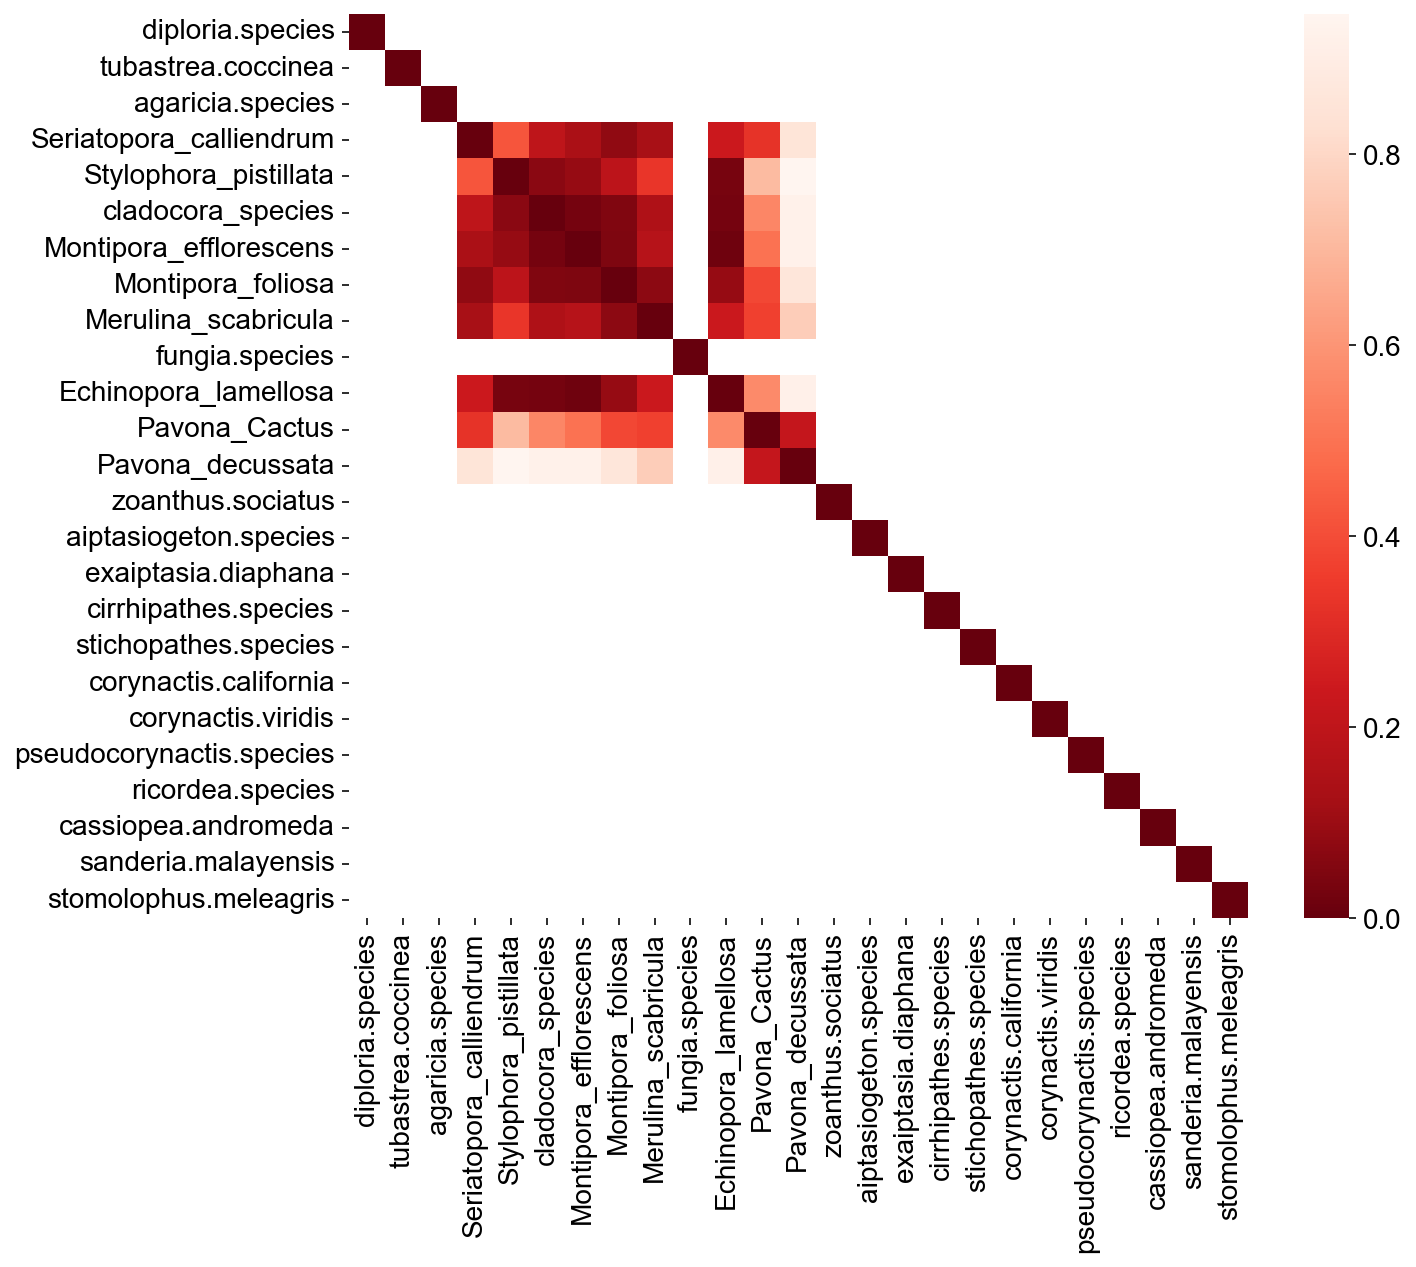

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.figure(figsize=[10,8])
sns.heatmap(
    d,cmap=plt.cm.get_cmap('Reds').reversed(),
    xticklabels=True,
    yticklabels=True)

<AxesSubplot:>

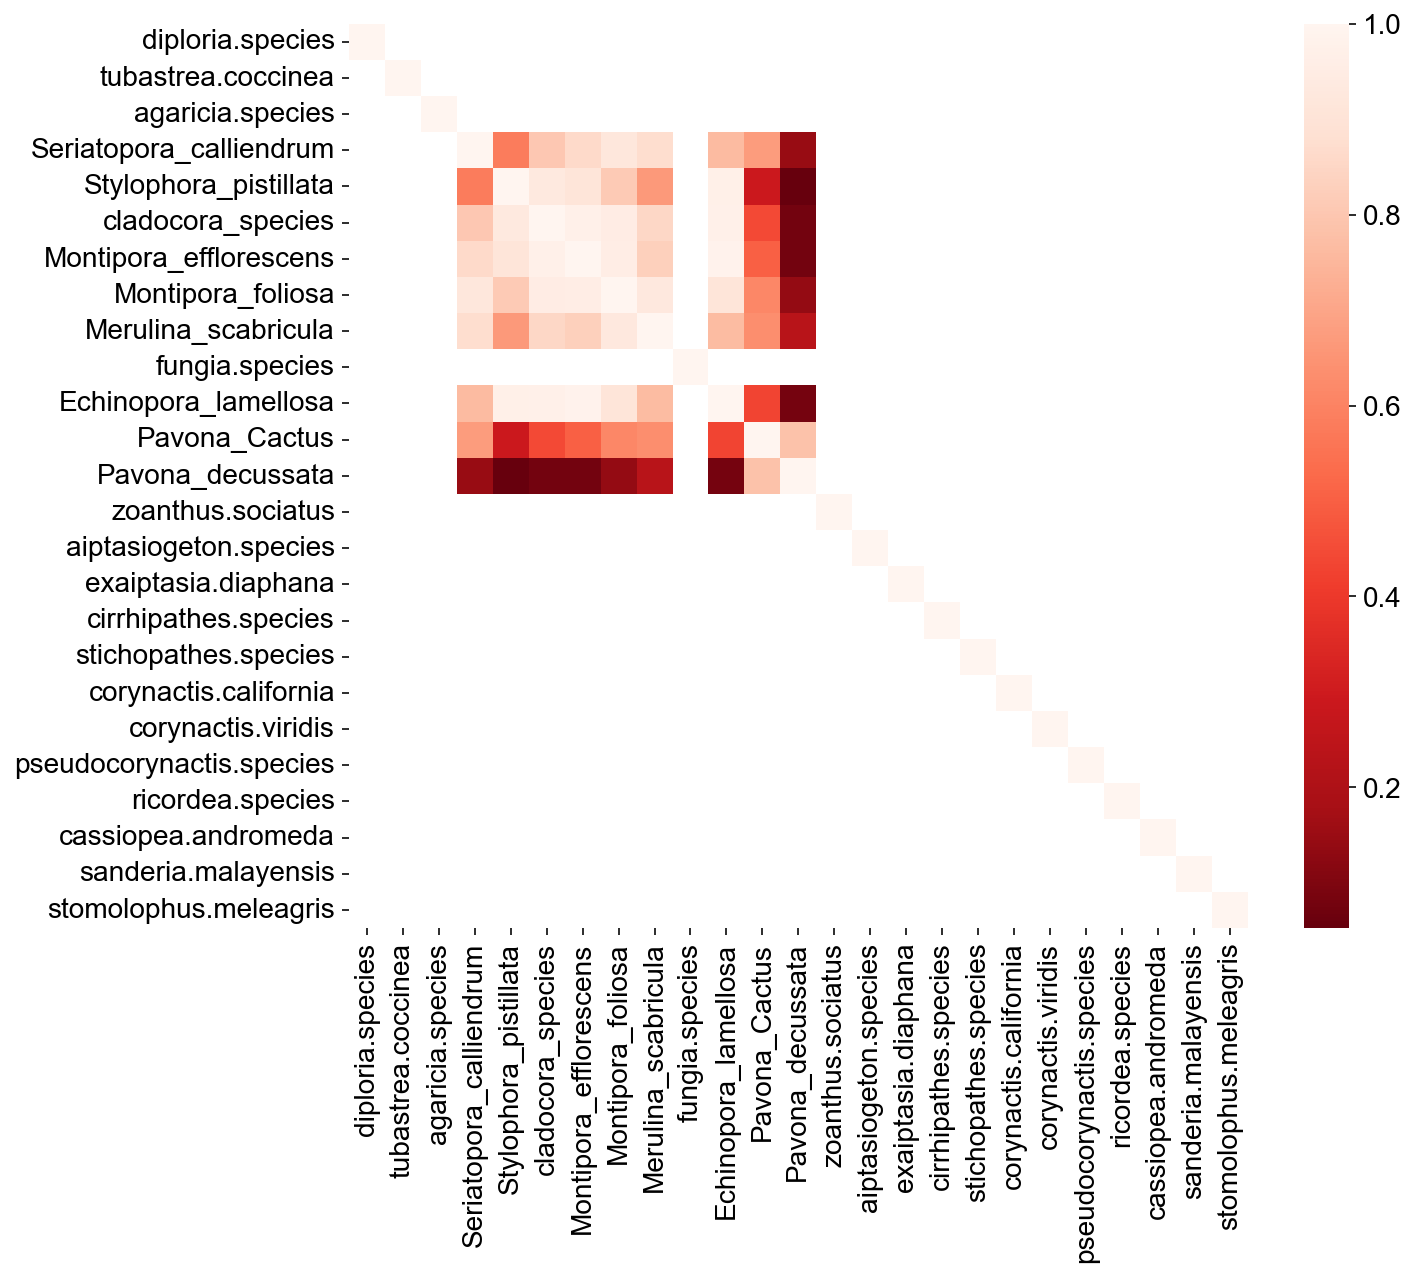

In [52]:
plt.figure(figsize=[10,8])
sns.heatmap(
    1-d,cmap=plt.cm.get_cmap('Reds').reversed(),
    xticklabels=True,
    yticklabels=True)

In [33]:
d = pd.DataFrame(itertools.combinations(perc.index, 2), columns=['i','j'])
d['dist'] = 1-pdist(perc, 'cosine')
d.sort_values('dist',ascending=False).head(30)

i                         j      dist
25     Stylophora_pistillata      Echinopora_lamellosa  0.983688
181    aiptasiogeton_species       sanderia_malayensis  0.980411
75         Montipora_foliosa         fungiidae_species  0.975882
164        zoanthus_sociatus       sanderia_malayensis  0.973124
156        zoanthus_sociatus     aiptasiogeton_species  0.972462
60    Montipora_efflorescens      Echinopora_lamellosa  0.970447
54         cladocora_species          ricordea_species  0.966760
57    Montipora_efflorescens         Montipora_foliosa  0.952872
59    Montipora_efflorescens         fungiidae_species  0.952091
112        fungiidae_species      stichopathes_species  0.935995
105        fungiidae_species      Echinopora_lamellosa  0.934513
162        zoanthus_sociatus          ricordea_species  0.930971
43         cladocora_species      Echinopora_lamellosa  0.928623
30     Stylophora_pistillata     aiptasiogeton_species  0.925955
28     Stylophora_pistillata         zoanthus_sociatus  0.924695
76         Montipora_foliosa      Echinopora_lamellosa  0.924157
20     Stylophora_pistillata         cladocora_species  0.924023
42         cladocora_species         fungiidae_species  0.922407
10   Seriatopora_calliendrum       exaiptasia_diaphana  0.920835
3    Seriatopora_calliendrum         Montipora_foliosa  0.920817
21     Stylophora_pistillata    Montipora_efflorescens  0.916223
2    Seriatopora_calliendrum    Montipora_efflorescens  0.916028
74         Montipora_foliosa       Merulina_scabricula  0.914299
67    Montipora_efflorescens      stichopathes_species  0.911864
46         cladocora_species         zoanthus_sociatus  0.910036
5    Seriatopora_calliendrum         fungiidae_species  0.907328
98       Merulina_scabricula      stichopathes_species  0.897681
192     stichopathes_species          ricordea_species  0.896058
50         cladocora_species      stichopathes_species  0.895765
184      cirripathes_species  pseudocorynactis_species  0.894398

In [ ]:
#Prep matrix for sorting according to correlation

In [34]:
def sort_correlation_matrix(correlation_matrix):
    cor = correlation_matrix
    top_col = cor[cor.columns[0]][1:]
    top_col = top_col.sort_values(ascending=True)
    ordered_columns = [cor.columns[0]] + top_col.index.tolist()
    return correlation_matrix[ordered_columns].reindex(ordered_columns)

In [41]:
d

Seriatopora_calliendrum  Stylophora_pistillata  \
Seriatopora_calliendrum                  0.000000               0.299686   
Stylophora_pistillata                    0.299686               0.000000   
cladocora_species                        0.256244               0.075977   
Montipora_efflorescens                   0.083972               0.083777   
Montipora_foliosa                        0.079183               0.151002   
Merulina_scabricula                      0.125375               0.309095   
fungiidae_species                        0.092672               0.125659   
Echinopora_lamellosa                     0.188293               0.016312   
Pavona_Cactus                            0.639772               0.854191   
Pavona_decussata                         0.892700               0.972010   
zoanthus_sociatus                        0.511690               0.075305   
exaiptasia_diaphana                      0.079165               0.369747   
aiptasiogeton_species                    0.598903               0.074045   
cirripathes_species                      0.571530               0.566348   
stichopathes_species                     0.120000               0.158459   
corynactis_california                    0.269316               0.558208   
pseudocorynactis_species                 0.715011               0.756432   
corynactis_viridis                       0.681900               0.883963   
ricordea_species                         0.338051               0.132110   
cassiopea_andromeda                      0.605517               0.298703   
sanderia_malayensis                      0.612838               0.111021   

                          cladocora_species  Montipora_efflorescens  \
Seriatopora_calliendrum            0.256244                0.083972   
Stylophora_pistillata              0.075977                0.083777   
cladocora_species                  0.000000                0.134603   
Montipora_efflorescens             0.134603                0.000000   
Montipora_foliosa                  0.107415                0.047128   
Merulina_scabricula                0.158156                0.177705   
fungiidae_species                  0.077593                0.047909   
Echinopora_lamellosa               0.071377                0.029553   
Pavona_Cactus                      0.739215                0.790763   
Pavona_decussata                   0.896920                0.975420   
zoanthus_sociatus                  0.089964                0.268591   
exaiptasia_diaphana                0.402056                0.152534   
aiptasiogeton_species              0.139251                0.300461   
cirripathes_species                0.334518                0.622026   
stichopathes_species               0.104235                0.088136   
corynactis_california              0.311945                0.420223   
pseudocorynactis_species           0.503809                0.783634   
corynactis_viridis                 0.590204                0.861340   
ricordea_species                   0.033240                0.219988   
cassiopea_andromeda                0.238513                0.461928   
sanderia_malayensis                0.125067                0.340260   

                          Montipora_foliosa  Merulina_scabricula  \
Seriatopora_calliendrum            0.079183             0.125375   
Stylophora_pistillata              0.151002             0.309095   
cladocora_species                  0.107415             0.158156   
Montipora_efflorescens             0.047128             0.177705   
Montipora_foliosa                  0.000000             0.085701   
Merulina_scabricula                0.085701             0.000000   
fungiidae_species                  0.024118             0.111959   
Echinopora_lamellosa               0.075843             0.225462   
Pavona_Cactus                      0.741071             0.663668   
Pavona_decussata                   0.916532             0.833462   
zoanthus_sociatus                  0.32639

<AxesSubplot:>

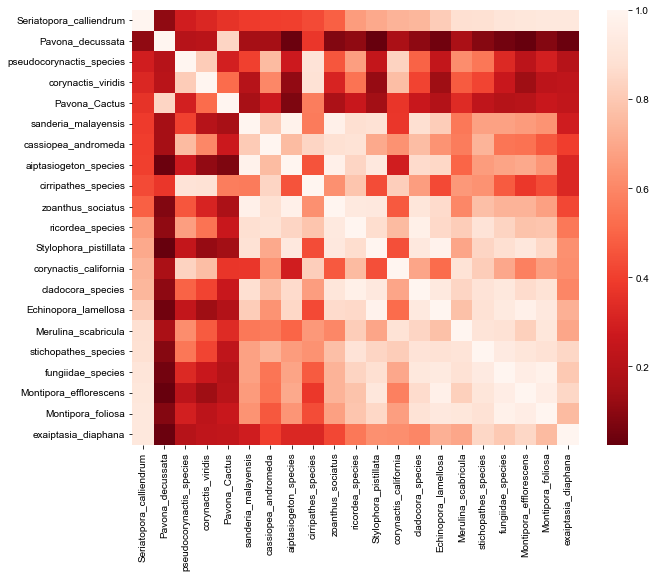

In [42]:
plt.figure(figsize=[10,8])
sns.heatmap(
    sort_correlation_matrix(1-d),cmap=plt.cm.get_cmap('Reds').reversed(),
    xticklabels=True,
    yticklabels=True)